<a href="https://colab.research.google.com/github/J2-nsung/machine-learning/blob/master/multi_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import copy

import keras
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils.np_utils import to_categorical

keras.__version__

Using TensorFlow backend.


'2.2.5'

In [0]:
# IMDB 데이터셋에서처럼 num_words=10000 매개변수는 데이터에서 가장 자주 등장하는 단어 10000개만 사용
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [0]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(8982,)
(8982,)
(2246,)
(2246,)


In [0]:
# IMDB 리뷰처럼 각샘플은 정수 리스트(단어 인덱스)
print(train_data[10])

# 샘플에 연결된 레이블은 토픽의 인덱스로 0과 45 사이의 정수
print(train_labels[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
3


In [0]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1. # results[i]에서 트정 인덱스의 위치를 1로 만든다
    return results

# 훈련 데이터를 벡터로 변환
x_train = vectorize_sequences(train_data)

# 테스트 데이터를 벡터로 변환
x_test = vectorize_sequences(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [0]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [0]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7982 samples, validate on 1000 samples
Epoch 1/20





7982/7982 [==============================] - 1s 150us/step - loss: 2.5254 - acc: 0.5149 - val_loss: 1.6935 - val_acc: 0.6420
Epoch 2/20
7982/7982 [==============================] - 1s 122us/step - loss: 1.3933 - acc: 0.7090 - val_loss: 1.3060 - val_acc: 0.7150
Epoch 3/20
7982/7982 [==============================] - 1s 123us/step - loss: 1.0403 - acc: 0.7779 - val_loss: 1.1521 - val_acc: 0.7490
Epoch 4/20
7982/7982 [==============================] - 1s 122us/step - loss: 0.8100 - acc: 0.8301 - val_loss: 1.0492 - val_acc: 0.7750
Epoch 5/20
7982/7982 [==============================] - 1s 124us/step - loss: 0.6400 - acc: 0.8675 - val_loss: 0.9830 - val_acc: 0.7990
Epoch 6/20
7982/7982 [==============================] - 1s 122us/step - loss: 0.5120 - acc: 0.8944 - val_loss: 0.9519 - val_acc: 0.8010
Epoch 7/20
7982/7982 [============

In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

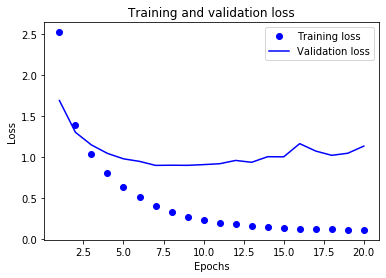

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# 'bo'는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

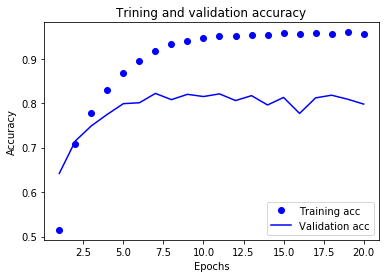

In [0]:
plt.clf() # 그래프를 초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Trining and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
print(results) # [, acc]

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 160us/step - loss: 0.0740 - acc: 0.9805 - val_loss: 0.0506 - val_acc: 0.9856
Epoch 2/9
7982/7982 [==============================] - 1s 128us/step - loss: 0.0428 - acc: 0.9884 - val_loss: 0.0395 - val_acc: 0.9897
Epoch 3/9
7982/7982 [==============================] - 1s 124us/step - loss: 0.0329 - acc: 0.9911 - val_loss: 0.0355 - val_acc: 0.9903
Epoch 4/9
7982/7982 [==============================] - 1s 123us/step - loss: 0.0268 - acc: 0.9924 - val_loss: 0.0332 - val_acc: 0.9908
Epoch 5/9
7982/7982 [==============================] - 1s 124us/step - loss: 0.0221 - acc: 0.9937 - val_loss: 0.0311 - val_acc: 0.9916
Epoch 6/9
7982/7982 [==============================] - 1s 125us/step - loss: 0.0184 - acc: 0.9946 - val_loss: 0.0306 - val_acc: 0.9917
Epoch 7/9
7982/7982 [==============================] - 1s 125us/step - loss: 0.0154 - acc: 0.9954 - val_loss: 0.0301 - val_acc: 0.9918
Epoch 8

In [0]:
# 데이터 테스트
predictions = model.predict(x_test)
print(predictions[0].shape)
print(np.argmax(predictions[0]))

(46,)
3


In [0]:
# 은닉 층의 노드 수를 출력 노드수에 비해 줄이면 안되는 이유 테스트
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# epochs를 4로 낮춤
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
print(results) # [, acc]

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 159us/step - loss: 0.0996 - acc: 0.9783 - val_loss: 0.0951 - val_acc: 0.9783
Epoch 2/9
7982/7982 [==============================] - 1s 124us/step - loss: 0.0906 - acc: 0.9783 - val_loss: 0.0885 - val_acc: 0.9783
Epoch 3/9
7982/7982 [==============================] - 1s 124us/step - loss: 0.0826 - acc: 0.9786 - val_loss: 0.0809 - val_acc: 0.9785
Epoch 4/9
7982/7982 [==============================] - 1s 122us/step - loss: 0.0731 - acc: 0.9789 - val_loss: 0.0710 - val_acc: 0.9788
Epoch 5/9
7982/7982 [==============================] - 1s 124us/step - loss: 0.0615 - acc: 0.9809 - val_loss: 0.0599 - val_acc: 0.9825
Epoch 6/9
7982/7982 [==============================] - 1s 123us/step - loss: 0.0511 - acc: 0.9848 - val_loss: 0.0519 - val_acc: 0.9850
Epoch 7/9
7982/7982 [==============================] - 1s 122us/step - loss: 0.0439 - acc: 0.9877 - val_loss: 0.0466 - val_acc: 0.9879
Epoch 8